In [10]:
% matplotlib inline
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [12]:
data = scipy.io.loadmat('grader/ex6data1.mat')
X = data['X']
y = data['y'].flatten()

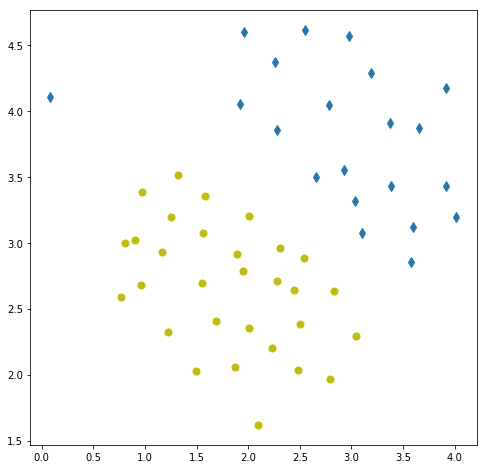

In [13]:
def plotData(X, y, ax):
    """plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix.

    Note: This was slightly modified such that it expects y = 1 or y = 0
    """

# Find Indices of Positive and Negative Examples
    pos = np.where(y==1, True, False).flatten()
    neg = np.where(y==0, True, False).flatten()

# Plot Examples
    ax.plot(X[pos,0], X[pos, 1], 'd', linewidth=1, markersize=7)
    ax.plot(X[neg,0], X[neg, 1], 'ko', color='y', markersize=7)
    
fig, ax = plt.subplots(figsize=[8,8])
plotData(X, y, ax)

In [9]:
def visualizeBoundaryLinear(X, y, model):
    """plots a linear decision boundary
    learned by the SVM and overlays the data on it
    """
    fig, ax = plt.subplots(figsize=[8,8])
    
    w = model.coef_.flatten()
    b = model.intercept_.flatten()
    xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    yp = -(w[0]*xp + b)/w[1]
    plotData(X, y, ax)
    ax.plot(xp, yp, '-b')

c:\users\matka\anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


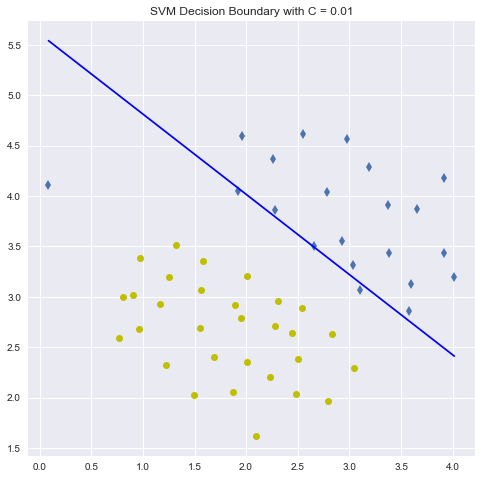

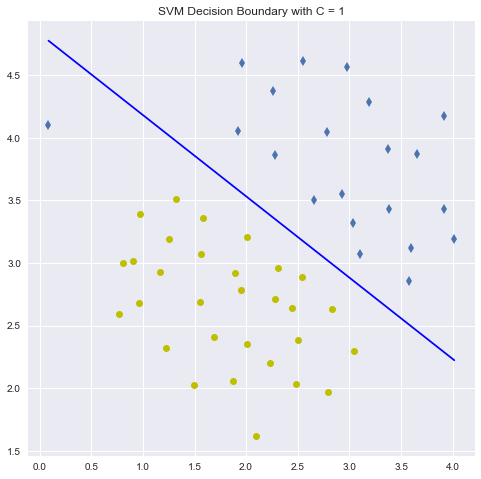

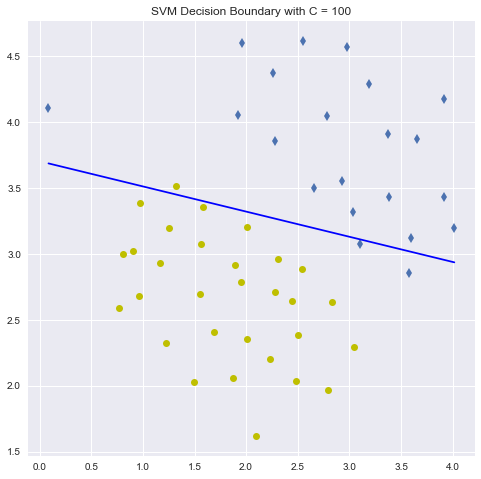

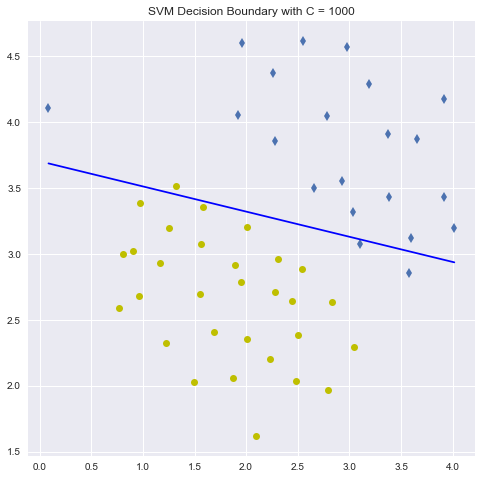

In [10]:
def visualize_svc(C):
    model = svm.SVC(C=C, kernel='linear', tol=1e-3, max_iter=20).fit(X, y)
    visualizeBoundaryLinear(X, y, model)
    title = 'SVM Decision Boundary with C = ' + str(C)
    plt.title(title)

c_list = [.01, 1, 100, 1000]
for C in c_list:
    visualize_svc(C)

In [11]:
def gaussianKernel(x1, x2, sigma):
    """returns a gaussian kernel between x1 and x2
    and returns the value in sim
    """

# Ensure that x1 and x2 are column vectors
#     x1 = x1.ravel()
#     x2 = x2.ravel()

# You need to return the following variables correctly.
    sim = 0

# ====================== YOUR CODE HERE ======================
# Instructions: Fill in this function to return the similarity between x1
#               and x2 computed using a Gaussian kernel with bandwidth
#               sigma
#
#
# =============================================================
    distance = np.sum(np.power(x1 - x2, 2))
    return np.exp(-distance / (2 * np.power(sigma, 2) ) )

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
EXPECTED_GAUSIAN_KERNEL_SIM = 0.324652

sim = gaussianKernel(x1, x2, sigma)
np.testing.assert_almost_equal(sim, EXPECTED_GAUSIAN_KERNEL_SIM, decimal=6)
print(f'Sim of gausian kernell for testing data is {sim}, expecting: {EXPECTED_GAUSIAN_KERNEL_SIM}')

Sim of gausian kernell for testing data is 0.32465246735834974, expecting: 0.324652


In [144]:
def visualizeBoundary(X, y, model, ax):
    """plots a non-linear decision boundary learned by the
    SVM and overlays the data on it"""

# Plot the training data on top of the boundary
    plotData(X, y, ax)

    # Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), X.shape[0]).T
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), X.shape[0]).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(this_X)
        
    # Plot the SVM boundary
#     contour(X1, X2, vals, [0 0], 'Color', 'b')
    plt.contour(X1, X2, vals)


c:\users\matka\anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


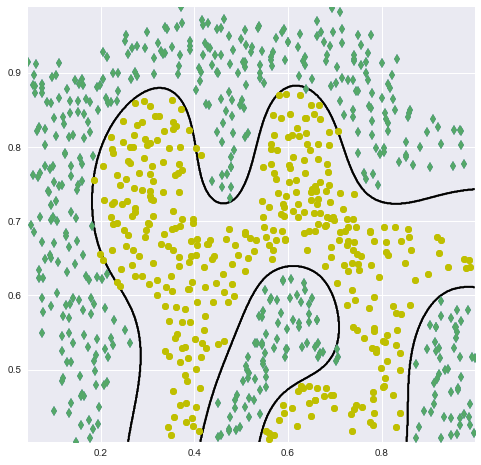

In [145]:
data = scipy.io.loadmat('grader/ex6data2.mat')
X = data['X']
y = data['y'].flatten()

# Plot training data
fig, ax = plt.subplots(figsize=[8,8])
plotData(X, y, ax)

C = 1
sigma = 0.1
gamma = 1.0 / (2.0 * sigma ** 2)
clf = svm.SVC(C=C, kernel='rbf', tol=1e-3, max_iter=200, gamma=gamma)
model = clf.fit(X, y)

visualizeBoundary(X, y, model, ax)

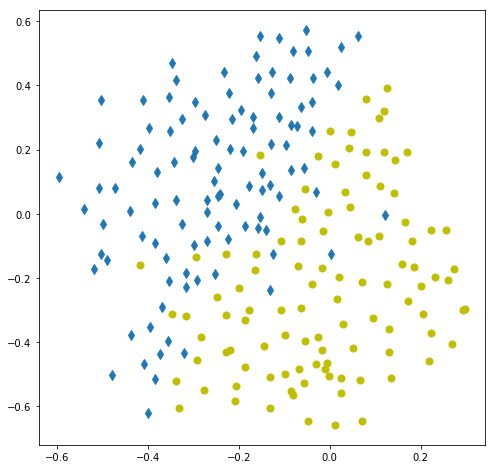

In [14]:
data = scipy.io.loadmat('grader/ex6data3.mat')
X = data['X']
y = data['y'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()

# Plot training data
fig, ax = plt.subplots(figsize=[8,8])
plotData(X, y, ax)

In [105]:
def get_best_acc(err):
    best = err.iloc[err[2].argmax()]
    return best[0], best[1]

def dataset3Params(X, y, Xval, yval):
    """returns your choice of C and sigma. You should complete
    this function to return the optimal C and sigma based on a
    cross-validation set.
    """
# ====================== YOUR CODE HERE ======================
# Instructions: Fill in this function to return the optimal C and sigma
#               learning parameters found using the cross validation set.
#               You can use svmPredict to predict the labels on the cross
#               validation set. For example, 
#                   predictions = svmPredict(model, Xval)
#               will return the predictions on the cross validation set.
#
#  Note: You can compute the prediction error using 
#        mean(double(predictions ~= yval))
#
    c_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sig_list = c_list
    err = []
    for c_val in c_list:
        for sig_val in sig_list:
            gamma = 1.0 / (2.0 * sig_val ** 2)
            clf = svm.SVC(C=c_val, kernel='rbf', gamma=gamma).fit(X, y)
            e = clf.score(Xval, yval)
            err.append([c_val, sig_val, e])
    return pd.DataFrame(err)

# =========================================================================


In [111]:
e = dataset3Params(X, y, Xval, yval)
C, sigma, error = get_best_acc(e)

print(f'\nBest C is {C}, sigma: {sigma}')
gamma = 1.0 / (2.0 * sigma ** 2)

# Train the SVM
clf = svm.SVC(C=C, kernel='rbf', tol=1e-3, max_iter=200, gamma=gamma)
model = clf.fit(X, y)

# fig, ax = plt.subplots(figsize=[8,8])
# visualizeBoundary(X, y, model, ax)

# sc = pd.DataFrame(scores)
# their = sc[2].values
# mine = list(e[3])
# pd.DataFrame([sc[0].values, sc[1], their, mine, their-mine]).T


Best C is 1.0, sigma: 0.1


c:\users\matka\anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
